<a href="https://colab.research.google.com/github/VeldiHruthika/Task-4-Classification-with-Logistic-Regression/blob/main/TASK_4_Classification_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Required Libraries**

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# **Load and Explore Dataset**

In [16]:
# Load Breast Cancer dataset
data = load_breast_cancer()

# Create DataFrame for features and Series for target
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Display dataset shape and target class names
print("Dataset shape:", X.shape)
print("Target classes:", data.target_names)

Dataset shape: (569, 30)
Target classes: ['malignant' 'benign']


# **Train-Test Split and Standardization**

In [17]:
# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Train Logistic Regression Model**

In [18]:
# Initialize and train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

# **Make Predictions**

In [19]:
# Predict class labels
y_pred = model.predict(X_test_scaled)

# Get predicted probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# **Evaluate Model - Confusion Matrix**

In [20]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[41  2]
 [ 1 70]]


# **Evaluate Model - Precision, Recall, F1-score**

In [21]:
# Print precision, recall, f1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# **Evaluate Model - ROC-AUC Score**

In [22]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("\nROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.99737962659679


# **Plot ROC Curve**

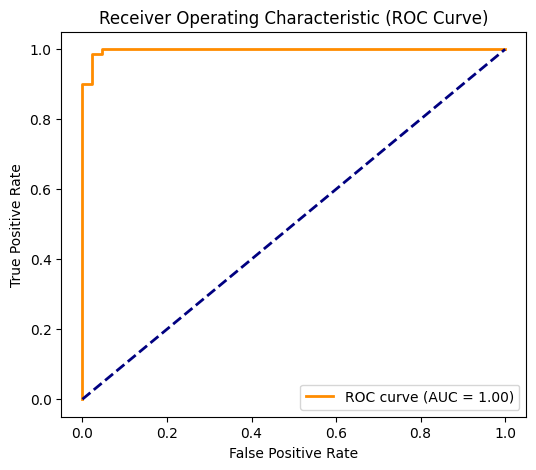

In [23]:
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

# **Threshold Tuning**

In [24]:
# Set a custom threshold
custom_threshold = 0.6

# Apply custom threshold to predicted probabilities
y_pred_custom = (y_proba >= custom_threshold).astype(int)

# Evaluate model performance at new threshold
print(f"\nConfusion Matrix with Threshold {custom_threshold}:\n", confusion_matrix(y_test, y_pred_custom))
print("\nClassification Report with Custom Threshold:\n", classification_report(y_test, y_pred_custom))


Confusion Matrix with Threshold 0.6:
 [[42  1]
 [ 1 70]]

Classification Report with Custom Threshold:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# **Sigmoid Function Explanation and Visualization**

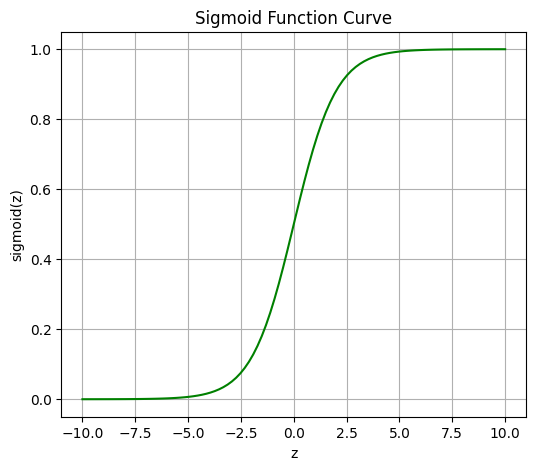

In [25]:
# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for plotting sigmoid curve
z_values = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z_values)

# Plot sigmoid curve
plt.figure(figsize=(6, 5))
plt.plot(z_values, sigmoid_values, color='green')
plt.title('Sigmoid Function Curve')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.show()